## Creating csv file

In [2]:
import codecs
from bs4 import BeautifulSoup
import csv
import os

In [3]:
csv_file = open('dou_jobs.csv', 'w', encoding='utf-8')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['headline', 'description'])

22

In [4]:
directory = 'result'
for filename in os.listdir(directory):    
    file = codecs.open(directory + '/' + filename, "r", 'utf-8')
    soup = BeautifulSoup(file)
    headline = soup.find('h1', class_="g-h2").get_text()
    vacancy = soup.find('div', class_="l-vacancy")
    descriptions = vacancy.find_all('div', class_="text b-typo vacancy-section")
    text = ''
    for description in descriptions:
        text += description.get_text().strip().replace('—', '')
    csv_writer.writerow([headline, text])

In [5]:
import pandas as pd

In [26]:
df = pd.read_csv('dou_jobs.csv')
csv_file.close()

In [27]:
df.head()

,headline,description
0,Python Software Engineer (Big Data project),ABOUT COMPANYSoftConstruct Ukraine is one of t...
1,Experienced ML Engineer,ЛУН найбільша PropTech компанія в Україні. На...
2,Full Stack Engineer for CV-based project,• 2-3+ years of Web Development (Frontend (30)...
3,Data Engineer,We’re incredibly happy to have been entrusted ...
4,"Python | ML Engineer (Part time, Full Time, Re...",Experience as a Data Engineer from 1.5 yearsGo...


## Text processing

In [28]:
df['is_data_engineer'] = df['headline'].apply(lambda x: 'data' in x.lower())
df.head()

,headline,description,is_data_engineer
0,Python Software Engineer (Big Data project),ABOUT COMPANYSoftConstruct Ukraine is one of t...,True
1,Experienced ML Engineer,ЛУН найбільша PropTech компанія в Україні. На...,False
2,Full Stack Engineer for CV-based project,• 2-3+ years of Web Development (Frontend (30)...,False
3,Data Engineer,We’re incredibly happy to have been entrusted ...,True
4,"Python | ML Engineer (Part time, Full Time, Re...",Experience as a Data Engineer from 1.5 yearsGo...,False


In [29]:
df_engineers = df.query('is_data_engineer == True').copy()
df_engineers.drop(['is_data_engineer'], axis=1, inplace=True)
df_engineers.head()

,headline,description
0,Python Software Engineer (Big Data project),ABOUT COMPANYSoftConstruct Ukraine is one of t...
3,Data Engineer,We’re incredibly happy to have been entrusted ...
5,Data Engineer,Technical skills you should have Data analysis...
6,Data Quality Engineer (BI),Seeking a Data Quality Engineer that has prove...
7,Data Engineer,"IntelliBoard Inc., is a growing EdTech softwar..."


In [30]:
df['is_data_engineer'].value_counts()

True     123
False     36
Name: is_data_engineer, dtype: int64

In [32]:
from nltk.tokenize import word_tokenize

In [33]:
def leave_relevant_technologies(lst_input):
    techno_list = ['Airflow', 'Apache', 'Asure', 'Bash', 'BigQuery', 'Databricks', 'Data Bricks', 'Data Factory', 
            'Delta Lake', 'Docker', 'ETL', 'Extract Load Transform', 'Fiddler', 'Flink', 'GCP', 'Google Cloud', 
            'Jenkins', 'Jira', 'Impala', 'InfluxDB',  'Kinesis', 'Linux', 'Mesos',  'OOP', 'Postman', 'PowerBI', 'PySpark', 
            'R-Studio', 'SAS', 'snowflake', 'Spring', 'SSIS', 'SSAS', 'QA', 'Tableau', 'Tensorflow']
    message_brokers = ['Kafka', 'RabbitMQ', 'AMQP', 'Redis']
    databases = ['SQL', 'NoSQL', 'SQL Server', 'Cassandra', 'Cosmos DB', 'MongoDB', 
                 'MySQL', 'RabGTD', 'Rabbit', 'Oracle', 'PostgreSQL', 'T-SQL']
    big_data = ['Hadoop', 'Hive', 'Hbase', 'MapReduce', 'Map Reduce', 'Pig', 'Spark']
    amazon = ['AWS', 'Redshift']
    formats = ['JSON', 'XML']
    prog_lang = ['C', 'C++', 'R', 'Kotlin', 'Scala', 'Java', 'JS', 'JavaScript', 'Python', 'ReactJS']
    soft_skills = ['Scrum', 'Agile']
    final_list = amazon + techno_list + formats+ message_brokers + databases + big_data + prog_lang + soft_skills
    lst_input = [w.lower() for w in lst_input]
    lst = [word for word in final_list if word.lower() in lst_input]
    return list(set(lst))

In [34]:
df_engineers['description'] = df_engineers['description'].apply(word_tokenize)
df_engineers['description'] = df_engineers['description'].apply(leave_relevant_technologies)

In [35]:
df_engineers.head(10)

,headline,description
0,Python Software Engineer (Big Data project),"[SQL, Apache, PostgreSQL, Spark, BigQuery, NoS..."
3,Data Engineer,"[Python, SQL, BigQuery, Tensorflow]"
5,Data Engineer,"[Java, SQL, PowerBI, R]"
6,Data Quality Engineer (BI),"[Python, QA, SQL]"
7,Data Engineer,"[SQL, PostgreSQL, Python, ETL, OOP]"
9,"Big Data Engineer (Canadian mining industry), ...","[SQL, PostgreSQL, BigQuery, Airflow, Python, GCP]"
12,Senior Software Engineer (Big Data) [Lviv],"[SQL, Spark, Kafka, AWS, Hive]"
13,Data Engineer,"[SQL, Airflow, AWS, Python, Tableau, ETL]"
14,Big Data DevOps Engineer Freelance (remote),"[Bash, Jenkins, Spark, Kafka, Airflow, Linux, ..."
15,Middle/Senior BigData Software Engineer,"[Jira, Apache, Spark, R]"


In [36]:
result = df_engineers['description'].tolist()
result = [item for sublist in result for item in sublist]

In [37]:
from collections import Counter
cnt = Counter(result).most_common()

In [38]:
total_number = df_engineers.shape[0]
final_result = []
for pair in cnt:
    pair = list(pair)
    pair[1] = round(pair[1] / total_number * 100, 2)
    final_result.append(tuple(pair))

In [39]:
final_result

[('Python', 65.04),
 ('SQL', 60.16),
 ('AWS', 50.41),
 ('Spark', 39.02),
 ('ETL', 34.15),
 ('Kafka', 29.27),
 ('Java', 23.58),
 ('PostgreSQL', 22.76),
 ('Redshift', 21.14),
 ('Airflow', 19.51),
 ('Docker', 18.7),
 ('Apache', 17.89),
 ('Hadoop', 17.89),
 ('Agile', 17.07),
 ('Scala', 15.45),
 ('MongoDB', 14.63),
 ('BigQuery', 13.01),
 ('NoSQL', 13.01),
 ('MySQL', 12.2),
 ('snowflake', 10.57),
 ('R', 9.76),
 ('Tableau', 9.76),
 ('Jenkins', 9.76),
 ('Linux', 8.94),
 ('GCP', 8.94),
 ('Hive', 8.94),
 ('PySpark', 8.94),
 ('Kinesis', 7.32),
 ('Cassandra', 7.32),
 ('Redis', 6.5),
 ('MapReduce', 5.69),
 ('Jira', 5.69),
 ('QA', 4.88),
 ('Oracle', 4.88),
 ('Scrum', 4.88),
 ('C++', 4.88),
 ('Tensorflow', 4.07),
 ('C', 4.07),
 ('JSON', 4.07),
 ('SSIS', 4.07),
 ('RabbitMQ', 4.07),
 ('Flink', 4.07),
 ('Hbase', 4.07),
 ('PowerBI', 3.25),
 ('OOP', 3.25),
 ('Bash', 3.25),
 ('JavaScript', 3.25),
 ('Databricks', 3.25),
 ('Fiddler', 1.63),
 ('Postman', 1.63),
 ('XML', 1.63),
 ('SSAS', 1.63),
 ('T-SQL', 1.63

## Visualisation

In [40]:
def leave_prog_lang(lst_input):
    prog_lang = ['C', 'C++', 'R', 'Kotlin', 'Scala', 'Java', 'JS', 'JavaScript', 'Python', 'ReactJS']
    lst_input = [w.lower() for w in lst_input]
    lst = [word for word in prog_lang if word.lower() in lst_input]
    return list(set(lst))

In [41]:
df_engineers['prog_lang'] = df_engineers['description'].apply(leave_prog_lang)

In [42]:
prog_langs = df_engineers['prog_lang'].tolist()
prog_langs = [item for sublist in prog_langs for item in sublist]

In [43]:
cnt_prog_langs = Counter(prog_langs).most_common()[:6]
cnt_prog_langs

[('Python', 80), ('Java', 29), ('Scala', 19), ('R', 12), ('C++', 6), ('C', 5)]

In [44]:
labels = []
slices = []
for pair in cnt_prog_langs:
    labels.append(pair[0])
    slices.append(pair[1])

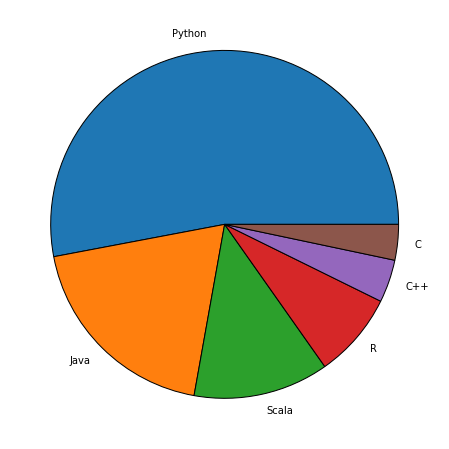

In [45]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,8]
plt.pie(slices, labels=labels, wedgeprops={'edgecolor':'black'});